In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
color_list = list(mcolors.TABLEAU_COLORS.keys())
color_list.append('k')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
k_B = 1.380649e-23
eV_to_K = 1.160451e4
mu_0 = 4*np.pi*1e-7

In [3]:
selected_events = pd.read_pickle('selected_events.pkl')

In [28]:
print(len(selected_events))
print(selected_events.keys())
selected_events['alpha_ratio_3DP'] = selected_events['alpha_density_3DP'] / selected_events['proton_density_3DP']
selected_events['alpha_ratio_ACE'] = selected_events['alpha_density_SWI'] / selected_events['proton_density_SWE']
selected_events['beta'] = (selected_events['proton_density_3DP']*1e6)*k_B*(selected_events['proton_temperature_3DP']*eV_to_K)/\
                            ((selected_events['B_total_WIND']*1e-9)**2/(2*mu_0))
selected_events['XB_criterion'] = 0.841*selected_events['B_total_WIND']*(selected_events['proton_density_3DP']**(-0.315))*\
                                    (selected_events['proton_temperature_3DP']**(-0.0222))*(selected_events['proton_speed_3DP']**(-0.171))
selected_events['SWICS_criterion'] = selected_events['O7toO6_ratio_SWI']/(6.008*np.exp(-0.00578*selected_events['proton_speed_3DP']))

segments = [(0,1),(1,2),(2,7),(7,23),(23,25),(25,26),(26,28),(28,44),(44,50),(50,53),(53,59)]

60
Index(['start', 'end', 'duration', 'num_of_log', 'fill_rate',
       'proton_density_3DP', 'proton_speed_3DP', 'proton_temperature_3DP',
       'alpha_density_3DP', 'electron_density_3DP', 'electron_speed_3DP',
       'electron_temperature_3DP', 'x_GSE_WIND', 'y_GSE_WIND', 'z_GSE_WIND',
       'x_GSE_ACE', 'y_GSE_ACE', 'z_GSE_ACE', 'proton_density_SWE',
       'proton_speed_SWE', 'proton_temperature_SWE', 'alpha_density_SWE',
       'alpha_density_SWI', 'C6toC5_ratio_SWI', 'O7toO6_ratio_SWI',
       'Q_avg_Fe_SWI', 'SW_type_SWI', 'B_total_WIND', 'B_total_ACE',
       'V_proton_x_GSE_3DP', 'B_azimuthal_angle_WIND', 'V_proton_y_GSE_3DP',
       'V_proton_z_GSE_3DP', 'FetoO', 'alpha_ratio_3DP', 'alpha_ratio_ACE',
       'beta', 'XB_criterion', 'SWICS_criterion'],
      dtype='object')


In [29]:
alpha_ratio_3DP = []
alpha_ratio_ACE = []
C6toC5_ratio_SWI = []
O7toO6_ratio_SWI = []
FetoO = []
proton_speed_3DP = []
proton_speed_SWE = []
XB_criterion = []
SWICS_criterion = []
V_proton_y_GSE_3DP = []
start_time = []
for i,seg_interval in enumerate(segments):
    start, end = seg_interval
    seg = selected_events.iloc[start:end]
    print('SEGMENT:',i)
    # 0:streamer 1:coronal hole 2:CME 3:unidentified 
    print(seg[['start','SW_type_SWI','alpha_ratio_3DP','XB_criterion','SWICS_criterion']])
    alpha_ratio_3DP.append(np.mean(seg['alpha_ratio_3DP']))
    alpha_ratio_ACE.append(np.mean(seg['alpha_ratio_ACE']))
    C6toC5_ratio_SWI.append(np.mean(seg['C6toC5_ratio_SWI']))
    O7toO6_ratio_SWI.append(np.mean(seg['O7toO6_ratio_SWI']))
    FetoO.append(np.mean(seg['FetoO']))
    proton_speed_3DP.append(np.mean(seg['proton_speed_3DP']))
    proton_speed_SWE.append(np.mean(seg['proton_speed_SWE']))
    XB_criterion.append(np.mean(seg['XB_criterion']))
    SWICS_criterion.append(np.mean(seg['SWICS_criterion']))
    V_proton_y_GSE_3DP.append(np.mean(seg['V_proton_y_GSE_3DP']))
    start_time.append(seg.iloc[0]['start'])
    print('\n')
    
    

SEGMENT: 0
                start  SW_type_SWI  alpha_ratio_3DP  XB_criterion  \
0 1999-05-11 18:25:00          0.0         0.039407      3.736949   

   SWICS_criterion  
0           0.1584  


SEGMENT: 1
                start  SW_type_SWI  alpha_ratio_3DP  XB_criterion  \
1 2000-03-29 04:45:00          3.0         0.015383      3.795527   

   SWICS_criterion  
1              NaN  


SEGMENT: 2
                start  SW_type_SWI  alpha_ratio_3DP  XB_criterion  \
2 2002-03-20 04:17:00          2.0         0.065215      4.705984   
3 2002-03-20 05:01:00          2.0         0.063176      4.750313   
4 2002-03-20 05:29:00          2.0         0.059751      4.561552   
5 2002-03-20 09:47:00          2.0         0.041644      5.965768   
6 2002-03-20 12:25:00          2.0         0.043107      5.684205   

   SWICS_criterion  
2         1.426891  
3         1.412350  
4         1.368029  
5         1.591285  
6         2.191454  


SEGMENT: 3
                 start  SW_type_SWI  alpha_rati

In [30]:
clustered_events = pd.DataFrame()
type_SW_ACE_code = [0,3,2,0,2,2,2,3,np.nan,np.nan,np.nan]
mapping_dict = {0:'Streamer',1:'CH',2:'ICME',3:'NotDefined',np.nan:'NotDefined'}
clustered_events['type_SW_ACE'] = [mapping_dict[code] for code in type_SW_ACE_code]
clustered_events['type_SW_Hajra'] = ['HSS','ICME','ICME','ICME','ICME','HSS','ICME','HSS','ICME','ICME','ICME']
for name in ['start_time','alpha_ratio_3DP','alpha_ratio_ACE','C6toC5_ratio_SWI','O7toO6_ratio_SWI','FetoO','proton_speed_3DP','proton_speed_SWE','alpha_ratio_3DP','XB_criterion','SWICS_criterion','V_proton_y_GSE_3DP']:
    exec(f"clustered_events['{name}']={name}")

In [31]:
clustered_events

,type_SW_ACE,type_SW_Hajra,start_time,alpha_ratio_3DP,alpha_ratio_ACE,C6toC5_ratio_SWI,O7toO6_ratio_SWI,FetoO,proton_speed_3DP,proton_speed_SWE,XB_criterion,SWICS_criterion,V_proton_y_GSE_3DP
0,Streamer,HSS,1999-05-11 18:25:00,0.039407,0.038307,NaN,0.259490,NaN,224.826630,312.214286,3.736949,0.158400,2.880479
1,NotDefined,ICME,2000-03-29 04:45:00,0.015383,NaN,NaN,NaN,NaN,287.269684,314.575012,3.795527,NaN,-57.536484
2,ICME,ICME,2002-03-20 04:17:00,0.054579,0.149842,4.229780,1.074362,0.132442,377.964880,392.495275,5.133564,1.598002,-1.145272
3,Streamer,ICME,2002-05-24 15:56:00,0.036507,0.006960,0.371550,NaN,0.180090,508.259804,498.099837,4.831870,NaN,52.926125
4,ICME,ICME,2002-07-19 16:55:00,0.112849,0.027003,5.590900,0.460570,0.204825,881.019379,783.610116,5.881984,11.868763,231.594225
5,ICME,HSS,2003-10-02 05:20:00,0.034139,NaN,2.650500,0.480220,0.142240,305.060608,306.853027,4.790830,0.466101,6.231535
6,ICME,ICME,2004-07-23 03:37:00,0.008985,0.016022,2.709900,0.558090,0.140700,659.037292,627.236499,5.001861,4.202386,108.391453
7,NotDefined,HSS,2004-09-12 23:24:00,0.007976,NaN,NaN,0.438570,0.680610,297.760259,350.299016,4.100086,0.471468,-48.888492
8,NotDefined,ICME,2013-01-17 19:28:00,0.015011,NaN,1.355617,0.558959,0.404373,379.539154,371.566586,4.371542,0.848705,9.810716
9,NotDefined,ICME,2015-06-23 09:06:00,0.028415,NaN,1.344600,1.835800,0.226637,659.448039,633.937920,6.388726,13.830217,34.373388


In [8]:
list(mcolors.TABLEAU_COLORS.keys())

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

In [9]:
k_fitting_Hui_Fu = -0.0027,-0.0028,-0.0028
b_fitting_Hui_Fu = 0.307, 0.422, 0.419
x1 = np.array([200,900])
y1 = list()
for k,b in zip(k_fitting_Hui_Fu,b_fitting_Hui_Fu):
    y1.append(np.exp(k*x1+b))

x2 = np.linspace(300,700) 
y2 = 240/(x2+100)-0.2

y_swics_criterion = 6.008*np.exp(-0.00578*x1)


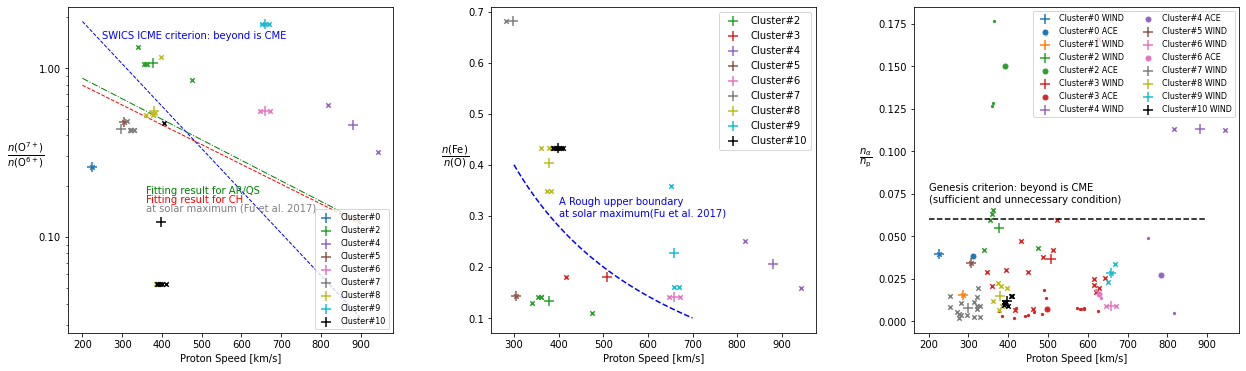

In [33]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
plt.subplots_adjust(wspace=0.3)

for i, cluster in clustered_events.iterrows():
    start, end = segments[i]
    seg = selected_events.iloc[start:end]
    
    for j, log in seg.iterrows():
        if not np.isnan(log['O7toO6_ratio_SWI']):
            axes[0].scatter(log['proton_speed_3DP'],log['O7toO6_ratio_SWI'],color=color_list[i],marker='x',s=20)
        if not np.isnan(log['FetoO']):
            axes[1].scatter(log['proton_speed_3DP'],log['FetoO'],color=color_list[i],marker='x',s=20)
        if not np.isnan(log['alpha_ratio_3DP']):
            axes[2].scatter(log['proton_speed_3DP'],log['alpha_ratio_3DP'],color=color_list[i],marker='x',s=20)
        if not np.isnan(log['alpha_ratio_ACE']):
            axes[2].scatter(log['proton_speed_SWE'],log['alpha_ratio_ACE'],color=color_list[i],marker='.',s=20)
    if not np.isnan(cluster['O7toO6_ratio_SWI']):
        axes[0].scatter(cluster['proton_speed_3DP'],cluster['O7toO6_ratio_SWI'],label=f"Cluster#{i}",color=color_list[i],marker='+',s=100)
    if not np.isnan(cluster['FetoO']):
        axes[1].scatter(cluster['proton_speed_3DP'],cluster['FetoO'],label=f"Cluster#{i}",color=color_list[i],marker='+',s=100)
    if not np.isnan(cluster['alpha_ratio_3DP']):
        axes[2].scatter(cluster['proton_speed_3DP'],cluster['alpha_ratio_3DP'],label=f"Cluster#{i} WIND",color=color_list[i],marker='+',s=100)
    if not np.isnan(cluster['alpha_ratio_ACE']):
        axes[2].scatter(cluster['proton_speed_SWE'],cluster['alpha_ratio_ACE'],label=f"Cluster#{i} ACE",color=color_list[i],marker='.',s=100)

        

ax = axes[0]
ax.semilogy()
ax.set_xlabel('Proton Speed [km/s]')
ax.set_ylabel(r'$\dfrac{n({\rm{O^{7+}}})}{n(\rm{O^{6+}})}$      ',rotation=0)
ax.plot(x1,y1[0],'r--',linewidth=1,zorder=0)
ax.plot(x1,y1[1],'g-.',linewidth=1,zorder=0)
ax.text(400-40,0.18,"Fitting result for AR/QS",color='g')
ax.text(400-40,0.16,"Fitting result for CH",color='r')
ax.text(400-40,0.16**2/0.18,"at solar maximum (Fu et al. 2017)",color='grey')
ax.plot(x1,y_swics_criterion,'b--',linewidth=1,zorder=0)
ax.text(250,1.5,"SWICS ICME criterion: beyond is CME",color='b')

ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.legend(loc='lower right',fontsize=8)

ax = axes[1]
ax.set_xlabel('Proton Speed [km/s]')
ax.set_ylabel(r'$\dfrac{n({\rm{Fe}}) }{ n(\rm{O})}$      ',rotation=0)
ax.legend(fontsize=10)
ax.plot(x2,y2,'b--')
ax.text(400,0.3,"A Rough upper boundary\nat solar maximum(Fu et al. 2017)",color='b')

ax = axes[2]
ax.set_xlabel('Proton Speed [km/s]')
ax.set_ylabel(r'$\dfrac{n_\alpha }{ n_{\rm p}}$      ',rotation=0)
ax.plot([200,900],[0.06,0.06],'k--')
ax.set_ylim
ax.text(200,.07,"Genesis criterion: beyond is CME\n(sufficient and unnecessary condition)",zorder=0)
ax.legend(fontsize=8,ncol=2);

plt.savefig('ions_result.png',dpi=500)

_ = 0;

In [11]:
log['alpha_ratio_3DP']

0.008750150656863926

In [12]:
i

10

In [13]:
for i,seg_interval in enumerate(segments):
    start, end = seg_interval
    seg = selected_events.iloc[start:end]
    print('SEGMENT:',i)
    seg[['proton_density_3DP','proton_density_SWE','B_total_WIND', 'B_total_ACE','proton_speed_3DP','proton_speed_SWE']]

SEGMENT: 0


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
0,0.271215,0.269954,7.752589,6.153875,224.82663,312.214286


SEGMENT: 1


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
1,0.305054,NaN,8.528295,8.663857,287.269684,314.575012


SEGMENT: 2


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
2,0.781050,0.584475,14.940422,14.928899,361.630859,364.501465
3,0.768492,0.804578,14.949922,15.169500,359.858734,360.607802
4,0.850568,0.814523,14.777750,14.890876,354.342468,358.829311
5,0.373249,NaN,14.955580,13.358667,339.507935,383.652235
6,0.396045,0.503657,15.522699,16.812549,474.484406,494.885563


SEGMENT: 3


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
7,0.109357,0.109981,10.132936,10.224263,629.160767,579.220244
8,0.093808,0.117315,9.980066,10.108500,616.309692,582.911704
9,0.102222,0.112400,9.933007,10.122000,616.408142,590.072021
10,0.096720,0.112900,9.936626,10.129500,620.991577,573.848376
11,0.133249,0.130530,9.932371,10.097200,643.340332,589.366797
12,0.090951,0.153788,10.030320,10.104800,624.759705,626.524127
13,0.079338,0.065072,10.009968,10.252833,512.824768,496.065538
14,0.060549,0.048983,10.060443,10.324251,521.724915,490.912412
15,0.221794,0.253470,9.941664,10.342751,448.523346,450.535366
16,0.248168,0.186890,9.937993,10.316667,488.020294,465.479980


SEGMENT: 4


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
23,0.323688,0.283408,18.423771,18.790251,817.931274,751.297251
24,0.263878,0.206100,15.702025,17.696333,944.107483,815.922982


SEGMENT: 5


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
25,1.503939,NaN,17.960726,18.190333,305.060608,306.853027


SEGMENT: 6


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
26,0.357758,0.26664,14.490361,14.486000,646.214783,620.222998
27,0.440573,0.35976,14.413029,14.335501,671.859802,634.250000


SEGMENT: 7


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
28,0.456002,NaN,10.329415,10.434500,281.209137,NaN
29,0.535589,NaN,10.568251,10.687333,252.706772,NaN
30,0.890999,NaN,10.696895,10.903666,254.148376,NaN
31,0.491377,NaN,10.850906,10.875500,271.807526,NaN
32,0.504412,NaN,10.853296,10.963000,276.218933,NaN
33,0.540217,NaN,10.891375,10.935666,276.482056,NaN
34,0.551758,NaN,10.895988,10.958875,280.618195,NaN
35,0.491856,NaN,10.913602,10.978667,297.379944,NaN
36,0.754192,NaN,10.943972,11.007000,312.912689,328.911447
37,0.374307,NaN,11.013451,10.967501,313.773407,360.245996


SEGMENT: 8


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
44,0.284162,0.354775,14.059055,14.064000,396.830841,384.575012
45,3.192571,0.630483,12.750490,13.356001,385.322845,370.383341
46,0.405961,NaN,12.330929,12.264000,377.830658,367.317993
47,0.318666,0.287371,12.058729,11.944000,360.587372,362.382847
48,0.593128,0.714210,11.552597,11.513334,374.243805,371.237012
49,0.542940,0.663378,11.299260,11.278500,382.419403,373.503309


SEGMENT: 9


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
50,0.415252,0.247389,17.609838,17.911908,651.161743,621.145383
51,0.239650,0.202471,17.120592,17.244499,658.557129,635.785714
52,0.260627,0.471395,16.349150,16.155750,668.625244,644.882662


SEGMENT: 10


,proton_density_3DP,proton_density_SWE,B_total_WIND,B_total_ACE,proton_speed_3DP,proton_speed_SWE
53,1.353974,1.701840,21.712387,21.647499,405.774353,389.608573
54,1.416796,NaN,22.403749,22.641500,409.823547,407.102509
55,1.547262,1.856953,24.206839,24.248399,393.944794,379.563534
56,2.427050,NaN,23.115677,23.393999,389.811523,381.492493
57,2.513014,NaN,23.115532,23.224499,388.437744,376.154989
58,1.867382,2.906900,22.985283,23.045500,399.798645,394.015991


# B-direction analysis

In [14]:
B_azimuthal_angle_by_segment = list()
for seg_interval in segments:
    start, end = seg_interval
    seg = selected_events.iloc[start:end]
    B_mean = np.mean(seg['B_azimuthal_angle_WIND'])
    B_std = np.std(seg['B_azimuthal_angle_WIND'])
    print(f"{B_mean:.4}+-{B_std:.4}({len(seg)})",end='\t')
    B_azimuthal_angle_by_segment.append(B_mean)

113.0+-0.0(1)	131.4+-0.0(1)	60.67+-1.962(5)	135.9+-6.965(16)	177.6+-2.087(2)	313.8+-0.0(1)	68.17+-3.983(2)	301.8+-4.914(16)	265.1+-9.494(6)	38.21+-3.806(3)	101.1+-13.14(6)	

In [15]:
B_azimuthal_angle_by_segment

[113.044482421875,
 131.37604166666668,
 60.67316624719099,
 135.8855829438913,
 177.58007032667877,
 313.80505859375,
 68.16706136067708,
 301.77389531146895,
 265.08564222019305,
 38.20985931587993,
 101.13514714826617]

# statistics

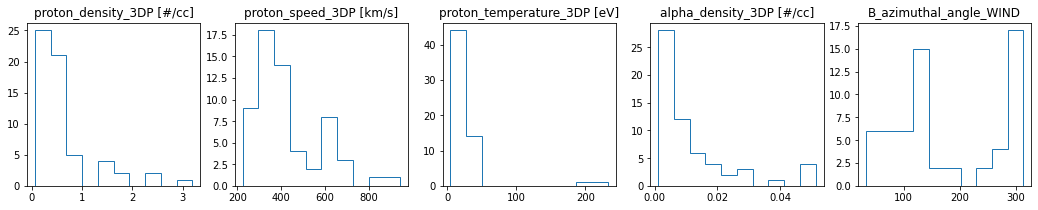

In [16]:
fig, axes = plt.subplots(1,5,figsize=(18,3))
ax = axes[0]
ax.hist(selected_events['proton_density_3DP'],bins=10,histtype='step')
ax.set_title('proton_density_3DP [#/cc]');

ax = axes[1]
ax.hist(selected_events['proton_speed_3DP'],bins=10,histtype='step')
ax.set_title('proton_speed_3DP [km/s]');

ax = axes[2]
ax.hist(selected_events['proton_temperature_3DP'],bins=10,histtype='step')
ax.set_title('proton_temperature_3DP [eV]');

ax = axes[3]
ax.hist(selected_events['alpha_density_3DP'],bins=10,histtype='step')
ax.set_title('alpha_density_3DP [#/cc]');

ax = axes[4]
ax.hist(selected_events['B_azimuthal_angle_WIND'],bins=10,histtype='step')
ax.set_title('B_azimuthal_angle_WIND');

In [17]:
segments = [(0,1),(1,2),(2,7),(7,23),(23,25),(25,26),(26,28),(28,44),(44,50),(50,53),(53,59)]

In [18]:
start, end = segments[10]
selected_events[['B_azimuthal_angle_WIND','start','duration','SW_type_SWI']][start:end]

,B_azimuthal_angle_WIND,start,duration,SW_type_SWI
53,116.996960,2016-10-13 15:46:00,9,NaN
54,106.502669,2016-10-13 18:24:00,7,NaN
55,117.052570,2016-10-13 21:20:00,20,NaN
56,85.189258,2016-10-13 23:42:00,6,NaN
57,87.124316,2016-10-13 23:52:00,7,NaN
58,93.945109,2016-10-14 01:20:00,7,NaN


In [19]:
events_cme_like = selected_events[selected_events['SW_type_SWI']==2]
events_cme_like[:2]

,start,end,duration,num_of_log,fill_rate,proton_density_3DP,proton_speed_3DP,proton_temperature_3DP,alpha_density_3DP,electron_density_3DP,...,V_proton_x_GSE_3DP,B_azimuthal_angle_WIND,V_proton_y_GSE_3DP,V_proton_z_GSE_3DP,FetoO,alpha_ratio_3DP,alpha_ratio_ACE,beta,XB_criterion,SWICS_criterion
2,2002-03-20 04:17:00,2002-03-20 04:56:00,40,30,0.750000,0.781050,361.630859,10.698833,0.050936,2.619239,...,-360.215384,60.686819,-6.330711,-23.867039,0.1413,0.065215,0.176278,0.015074,4.705984,1.426891
3,2002-03-20 05:01:00,2002-03-20 05:11:00,11,8,0.727273,0.768492,359.858734,9.433576,0.048550,2.612295,...,-358.404989,61.278901,-6.068990,-30.573326,0.1413,0.063176,0.128055,0.013061,4.750313,1.412350


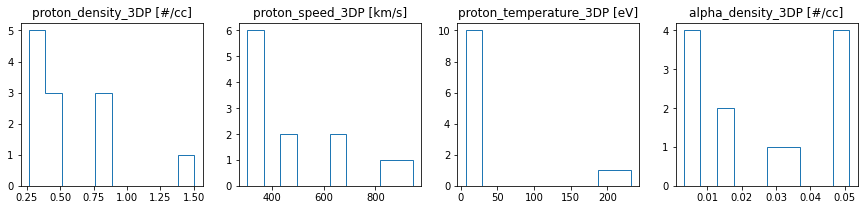

In [20]:
fig, axes = plt.subplots(1,4,figsize=(15,3))
ax = axes[0]
ax.hist(events_cme_like['proton_density_3DP'],bins=10,histtype='step')
ax.set_title('proton_density_3DP [#/cc]');

ax = axes[1]
ax.hist(events_cme_like['proton_speed_3DP'],bins=10,histtype='step')
ax.set_title('proton_speed_3DP [km/s]');

ax = axes[2]
ax.hist(events_cme_like['proton_temperature_3DP'],bins=10,histtype='step')
ax.set_title('proton_temperature_3DP [eV]');

ax = axes[3]
ax.hist(events_cme_like['alpha_density_3DP'],bins=10,histtype='step')
ax.set_title('alpha_density_3DP [#/cc]');

In [21]:
events_streamer_like = selected_events[selected_events['SW_type_SWI']==0]

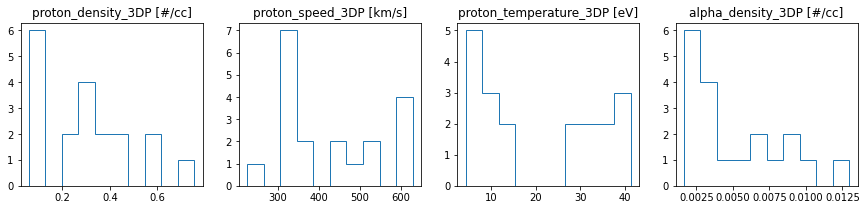

In [22]:
fig, axes = plt.subplots(1,4,figsize=(15,3))
ax = axes[0]
ax.hist(events_streamer_like['proton_density_3DP'],bins=10,histtype='step')
ax.set_title('proton_density_3DP [#/cc]');

ax = axes[1]
ax.hist(events_streamer_like['proton_speed_3DP'],bins=10,histtype='step')
ax.set_title('proton_speed_3DP [km/s]');

ax = axes[2]
ax.hist(events_streamer_like['proton_temperature_3DP'],bins=10,histtype='step')
ax.set_title('proton_temperature_3DP [eV]');

ax = axes[3]
ax.hist(events_streamer_like['alpha_density_3DP'],bins=10,histtype='step')
ax.set_title('alpha_density_3DP [#/cc]');

In [23]:
events_not_identified = selected_events[selected_events['SW_type_SWI']==3]

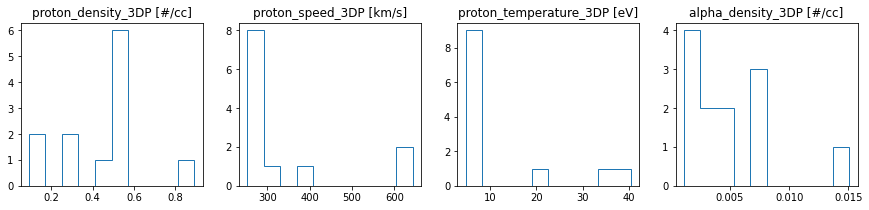

In [24]:
fig, axes = plt.subplots(1,4,figsize=(15,3))
ax = axes[0]
ax.hist(events_not_identified['proton_density_3DP'],bins=10,histtype='step')
ax.set_title('proton_density_3DP [#/cc]');

ax = axes[1]
ax.hist(events_not_identified['proton_speed_3DP'],bins=10,histtype='step')
ax.set_title('proton_speed_3DP [km/s]');

ax = axes[2]
ax.hist(events_not_identified['proton_temperature_3DP'],bins=10,histtype='step')
ax.set_title('proton_temperature_3DP [eV]');

ax = axes[3]
ax.hist(events_not_identified['alpha_density_3DP'],bins=10,histtype='step')
ax.set_title('alpha_density_3DP [#/cc]');

In [25]:
events_not_identified.corr()

,duration,num_of_log,fill_rate,proton_density_3DP,proton_speed_3DP,proton_temperature_3DP,alpha_density_3DP,electron_density_3DP,electron_speed_3DP,electron_temperature_3DP,...,V_proton_x_GSE_3DP,B_azimuthal_angle_WIND,V_proton_y_GSE_3DP,V_proton_z_GSE_3DP,FetoO,alpha_ratio_3DP,alpha_ratio_ACE,beta,XB_criterion,SWICS_criterion
duration,1.000000,0.990494,0.343711,-0.533182,0.476080,0.478211,0.037570,0.469668,-0.642761,-0.399718,...,-0.497895,-0.666695,0.192802,-0.569800,NaN,0.052270,-0.637856,0.602464,0.305309,NaN
num_of_log,0.990494,1.000000,0.438070,-0.481034,0.392780,0.411255,0.031891,0.446132,-0.624453,-0.389315,...,-0.413949,-0.632325,0.106054,-0.529215,NaN,0.029997,-0.764045,0.576156,0.252196,NaN
fill_rate,0.343711,0.438070,1.000000,0.083209,-0.186471,-0.173849,-0.280534,0.119104,-0.094024,-0.151846,...,0.181542,-0.095516,-0.348269,-0.039464,NaN,-0.172867,-0.998786,-0.010059,-0.186749,NaN
proton_density_3DP,-0.533182,-0.481034,0.083209,1.000000,-0.800914,-0.787566,-0.355916,-0.669853,0.810698,0.705768,...,0.799220,0.824903,-0.654648,0.728675,NaN,-0.609753,-0.901654,-0.219374,-0.824949,NaN
proton_speed_3DP,0.476080,0.392780,-0.186471,-0.800914,1.000000,0.977549,0.492439,0.498816,-0.552300,-0.416271,...,-0.999398,-0.730277,0.942269,-0.910374,NaN,0.722407,0.991489,0.512565,0.876352,NaN
proton_temperature_3DP,0.478211,0.411255,-0.173849,-0.787566,0.977549,1.000000,0.645132,0.524663,-0.591623,-0.435008,...,-0.975443,-0.762433,0.935932,-0.956115,NaN,0.807041,0.859324,0.598600,0.879337,NaN
alpha_density_3DP,0.037570,0.031891,-0.280534,-0.355916,0.492439,0.645132,1.000000,0.366520,-0.342527,-0.262626,...,-0.477634,-0.460624,0.618465,-0.646959,NaN,0.853227,-0.053176,0.526430,0.515773,NaN
electron_density_3DP,0.469668,0.446132,0.119104,-0.669853,0.498816,0.524663,0.366520,1.000000,-0.906352,-0.944593,...,-0.499782,-0.925820,0.369170,-0.569766,NaN,0.400197,0.921134,0.430461,0.291414,NaN
electron_speed_3DP,-0.642761,-0.624453,-0.094024,0.810698,-0.552300,-0.591623,-0.342527,-0.906352,1.000000,0.886922,...,0.558962,0.944805,-0.369430,0.617508,NaN,-0.385493,0.899193,-0.446998,-0.444747,NaN
electron_temperature_3DP,-0.399718,-0.389315,-0.151846,0.705768,-0.416271,-0.435008,-0.262626,-0.944593,0.886922,1.000000,...,0.415684,0.865541,-0.265696,0.465405,NaN,-0.354501,0.594608,-0.261859,-0.290716,NaN


In [26]:
event_there_is_heavy_ions = selected_events[np.logical_not(np.isnan(selected_events['C6toC5_ratio_SWI']))]

In [27]:
event_there_is_heavy_ions.corr()

,duration,num_of_log,fill_rate,proton_density_3DP,proton_speed_3DP,proton_temperature_3DP,alpha_density_3DP,electron_density_3DP,electron_speed_3DP,electron_temperature_3DP,...,V_proton_x_GSE_3DP,B_azimuthal_angle_WIND,V_proton_y_GSE_3DP,V_proton_z_GSE_3DP,FetoO,alpha_ratio_3DP,alpha_ratio_ACE,beta,XB_criterion,SWICS_criterion
duration,1.000000,0.993593,-0.032009,-0.310281,0.261864,0.253309,0.192343,0.261290,-0.243716,-0.117441,...,-0.259435,-0.356485,0.139969,-0.171507,-0.432182,0.473300,0.707813,0.036076,0.221038,0.313473
num_of_log,0.993593,1.000000,0.057626,-0.301947,0.295235,0.262619,0.139139,0.221870,-0.182168,-0.074329,...,-0.296565,-0.383525,0.142308,-0.176629,-0.395474,0.436479,0.670792,0.035101,0.268787,0.361778
fill_rate,-0.032009,0.057626,1.000000,0.273587,0.165078,0.051629,-0.329479,-0.039550,0.410734,0.331069,...,-0.192874,-0.425964,-0.042910,-0.118021,0.334540,-0.256220,-0.179992,-0.030958,0.462622,0.259581
proton_density_3DP,-0.310281,-0.301947,0.273587,1.000000,-0.412095,-0.274596,0.345187,0.362852,0.357496,0.094444,...,0.415923,0.083329,-0.173450,-0.117817,0.520962,-0.322022,0.669742,0.376572,-0.386361,-0.495387
proton_speed_3DP,0.261864,0.295235,0.165078,-0.412095,1.000000,0.732720,-0.284792,-0.358749,0.331561,0.545615,...,-0.997813,-0.360499,0.822752,0.025052,-0.306270,0.295851,-0.610497,0.283662,0.471281,0.852207
proton_temperature_3DP,0.253309,0.262619,0.051629,-0.274596,0.732720,1.000000,0.098973,0.007830,0.047123,0.440714,...,-0.703216,-0.042671,0.824332,-0.546111,-0.158917,0.682590,-0.250635,0.507511,0.365564,0.601358
alpha_density_3DP,0.192343,0.139139,-0.329479,0.345187,-0.284792,0.098973,1.000000,0.660907,-0.239056,-0.117790,...,0.306935,-0.046893,-0.037627,-0.385549,-0.265013,0.630599,0.722054,0.212728,-0.197498,-0.220627
electron_density_3DP,0.261290,0.221870,-0.039550,0.362852,-0.358749,0.007830,0.660907,1.000000,-0.589311,-0.296790,...,0.386025,-0.261261,-0.103372,-0.302768,-0.269881,0.415115,0.766107,0.196159,-0.243849,-0.402709
electron_speed_3DP,-0.243716,-0.182168,0.410734,0.357496,0.331561,0.047123,-0.239056,-0.589311,1.000000,0.664839,...,-0.360334,-0.060825,0.181627,0.046741,0.516216,-0.386056,-0.522145,0.128747,0.214619,0.350511
electron_temperature_3DP,-0.117441,-0.074329,0.331069,0.094444,0.545615,0.440714,-0.117790,-0.296790,0.664839,1.000000,...,-0.546971,-0.212614,0.496416,-0.095800,0.240717,-0.015648,-0.551683,0.056615,0.539392,0.416483
